CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

In [93]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [96]:
df = pd.read_csv('titanic.csv')

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
data = df[['Pclass','Age','Sex','Fare']]

In [100]:
data.head()

,Pclass,Age,Sex,Fare
0,3,22.0,male,7.2500
1,1,38.0,female,71.2833
2,3,26.0,female,7.9250
3,1,35.0,female,53.1000
4,3,35.0,male,8.0500


In [101]:
data.replace({'male':1,'female':0},inplace=True)

C:\Users\moels\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [102]:
data.head()

,Pclass,Age,Sex,Fare
0,3,22.0,1,7.2500
1,1,38.0,0,71.2833
2,3,26.0,0,7.9250
3,1,35.0,0,53.1000
4,3,35.0,1,8.0500


In [103]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [104]:
data.isnull().sum()

Pclass      0
Age       177
Sex         0
Fare        0
dtype: int64

In [105]:
data.describe()

,Pclass,Age,Sex,Fare
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.647587,32.204208
std,0.836071,14.526497,0.477990,49.693429
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,7.910400
50%,3.000000,28.000000,1.000000,14.454200
75%,3.000000,38.000000,1.000000,31.000000
max,3.000000,80.000000,1.000000,512.329200


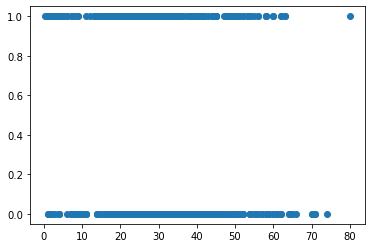

In [106]:
plt.scatter(df.Age,df.Survived)
plt.show()

In [107]:
data.fillna(data.Age.mean(),inplace=True)

C:\Users\moels\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [108]:
data.isnull().sum()

Pclass    0
Age       0
Sex       0
Fare      0
dtype: int64

In [109]:
y = df.Survived

In [110]:
from sklearn.model_selection import train_test_split

In [122]:
x_train , x_test , y_train , y_test = train_test_split(data,y,stratify=y,test_size=.15,random_state=1)

In [123]:
from sklearn import tree

In [124]:
model = tree.DecisionTreeClassifier()

In [125]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [127]:
y_predict = model.predict(x_test)

In [128]:
model.score(x_test,y_test)

0.7910447761194029

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
CM = confusion_matrix(y_test,y_predict)

In [120]:
import seaborn as sns

Text(33.0, 0.5, 'Truth')

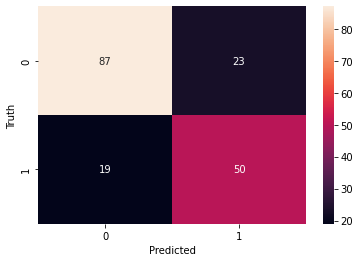

In [121]:
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')